<a href="https://colab.research.google.com/github/arijit1201/ml_algos_from_scratch/blob/master/ml_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np

In [0]:
#dummy data
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

In [0]:
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

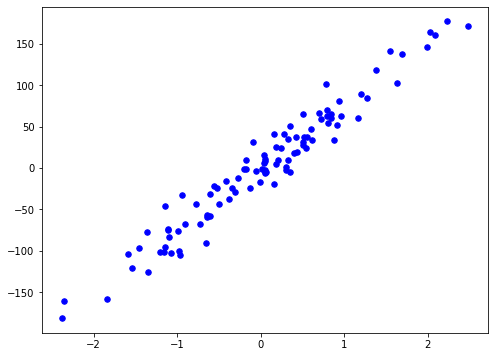

In [0]:
fig = plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], y, color="b", marker="o", s=30)

In [0]:
print(X_train.shape)

(80, 1)


In [0]:
class LinearRegression:
  def __init__(self, lr=0.001, n_iters=1000):
    self.lr = lr
    self.n_iters = n_iters
    self.weights = None
    self.bias = None
  def fit(self, X, y):
    # init parameters
    n_samples,n_features = X.shape
    self.weights = np.zeros(n_features)
    self.bias = 0
    #grad desc
    for _ in range(self.n_iters):
      y_pred = np.dot(X, self.weights)+ self.bias  #look into numpy dot function
      dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
      db = (1/n_samples) * np.sum(y_pred - y)
      self.weights -= self.lr*dw
      self.bias -= self.lr*db
  def predict(self, X):
    y_pred = np.dot(X, self.weights)+ self.bias
    return y_pred

In [0]:
regressor = LinearRegression(lr=0.01)
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

def mse(y_true, y_predicted):
  return np.mean((y_true - y_predicted)**2)

mse_value = mse(y_test, predicted)
print(mse_value)

305.7719958301902


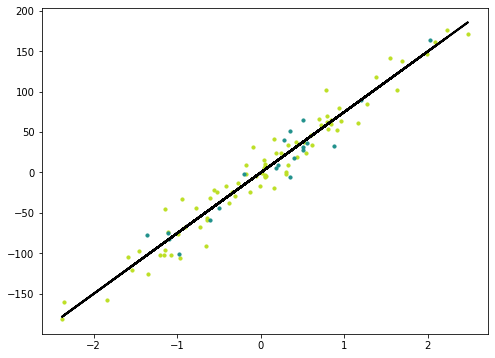

In [0]:
 #lets plot
 y_pred_line = regressor.predict(X)
 cmap = plt.get_cmap('viridis')
 fig = plt.figure(figsize=(8,6))
 m1 = plt.scatter(X_train,y_train, color=cmap(0.9), s=10)
 m2 = plt.scatter(X_test,y_test, color=cmap(0.5), s=10)
 plt.plot(X, y_pred_line, color="black", linewidth=2, label="Prediction")
 plt.show()

In [0]:
class LogisticRegression:
  def __init__(self, lr=0.001, n_iters=1000):
    self.lr = lr
    self.n_iters = n_iters
    self.weights = None
    self.bias = None
  def fit(self, X, y):
    # init parameters
    n_samples,n_features = X.shape
    self.weights = np.zeros(n_features)
    self.bias = 0
    #grad desc
    for _ in range(self.n_iters):
      linear_model = np.dot(X, self.weights) + self.bias
      y_pred = self._sigmoid(linear_model)
      dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
      db = (1/n_samples) * np.sum(y_pred - y)
      self.weights -= self.lr*dw
      self.bias -= self.lr*db
  def predict(self, X):
    linear_model = np.dot(X, self.weights) + self.bias
    y_pred = self._sigmoid(linear_model)
    y_predicted_cls = [1 if i>0.5 else 0 for i in y_pred]
    return y_predicted_cls
  def _sigmoid(self, x):
    return 1/(1 + np.exp(-x))

In [0]:
# to test
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

def accuracy(y_true, y_pred):
  accuracy = np.sum(y_true == y_pred)/len(y_true)
  return accuracy

In [0]:
regressorr = LogisticRegression(lr=0.0001, n_iters=1000)
regressorr.fit(X_train,  y_train)
preds = regressorr.predict(X_test)

print(accuracy(y_test, preds))

0.9298245614035088


In [0]:
class NaiveBayes:

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        # calculate mean, var, and prior for each class
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors =  np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):
            X_c = X[y==c]
            self._mean[idx, :] = X_c.mean(axis=0)
            self._var[idx, :] = X_c.var(axis=0)
            self._priors[idx] = X_c.shape[0] / float(n_samples)

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []

        # calculate posterior probability for each class
        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            posterior = np.sum(np.log(self._pdf(idx, x)))
            posterior = prior + posterior
            posteriors.append(posterior)
            
        # return class with highest posterior probability
        return self._classes[np.argmax(posteriors)]
            

    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(- (x-mean)**2 / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator


In [0]:
def accuracy(y_true, y_pred):
  accuracy = np.sum(y_true == y_pred)/len(y_true)
  return accuracy
X, y = datasets.make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=1234)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [0]:
nb = NaiveBayes()
nb.fit(X_train, y_train)
predicts = nb.predict(X_test)

print(accuracy(y_test, predicts))

0.95


In [0]:
#for testing KNN
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

iris = datasets.load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

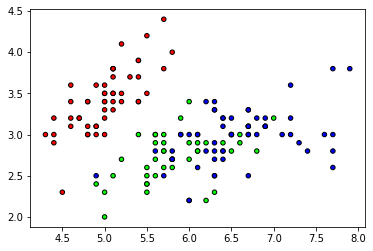

In [6]:
#print(X_train.shape)
#print(X_train[0])
#print(y_train.shape)
#print(y_train[0])
plt.figure()
plt.scatter(X[:,0], X[:,1], c=y, cmap=cmap,edgecolor='k',s=20)
plt.show()

In [0]:
from collections import Counter 
def euclidean_distance(x1, x2):
  return np.sqrt(np.sum((x1-x2)**2))
class KNN:
  def __init__(self,k=3):
    self.k = k

  def fit(self,X,y):
    self.X_train = X
    self.y_train = y
  def predict(self, X):
    predicted_labels = [self._predict(x) for x in X]
    return np.array(predicted_labels)
  def _predict(self, x):
    #compute distances
    distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
    #k nearest samples and labels
    k_indices = np.argsort(distances)[:self.k]
    k_nearest_labels = [self.y_train[i] for i in k_indices]
    #majority vote for most common class label
    most_common = Counter(k_nearest_labels).most_common(1)
    return most_common[0][0]

In [12]:
clf = KNN(k=7)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)

acc = np.sum(predictions == y_test)/len(y_test)
print(acc)

0.9666666666666667
